# **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Stock.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,06-FEB-2023,17818.55,17823.70,17698.35,17764.60,282544790,21864.88
1,07-FEB-2023,17790.10,17811.15,17652.55,17721.50,354395693,23611.08
2,08-FEB-2023,17750.30,17898.70,17744.15,17871.70,290994265,23733.40
3,09-FEB-2023,17885.50,17916.90,17779.80,17893.45,260854055,21529.97
4,10-FEB-2023,17847.55,17876.95,17801.00,17856.50,231991834,17063.99


In [ ]:
df.shape

(248, 7)

In [ ]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [ ]:
df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Shares Traded               int64
Turnover (₹ Cr)           float64
dtype: object

In [ ]:
df['Date '] = pd.to_datetime(df['Date '])
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2023-02-06,17818.55,17823.70,17698.35,17764.60,282544790,21864.88
1,2023-02-07,17790.10,17811.15,17652.55,17721.50,354395693,23611.08
2,2023-02-08,17750.30,17898.70,17744.15,17871.70,290994265,23733.40
3,2023-02-09,17885.50,17916.90,17779.80,17893.45,260854055,21529.97
4,2023-02-10,17847.55,17876.95,17801.00,17856.50,231991834,17063.99


In [ ]:
df['Date '].max()-df['Date '].min()

Timedelta('365 days 00:00:00')

In [ ]:
df.iloc[-90:].describe().astype(int)

In [ ]:
df.index = df['Date ']

# **GENERAL VARIATION IN STOCK PRICES**

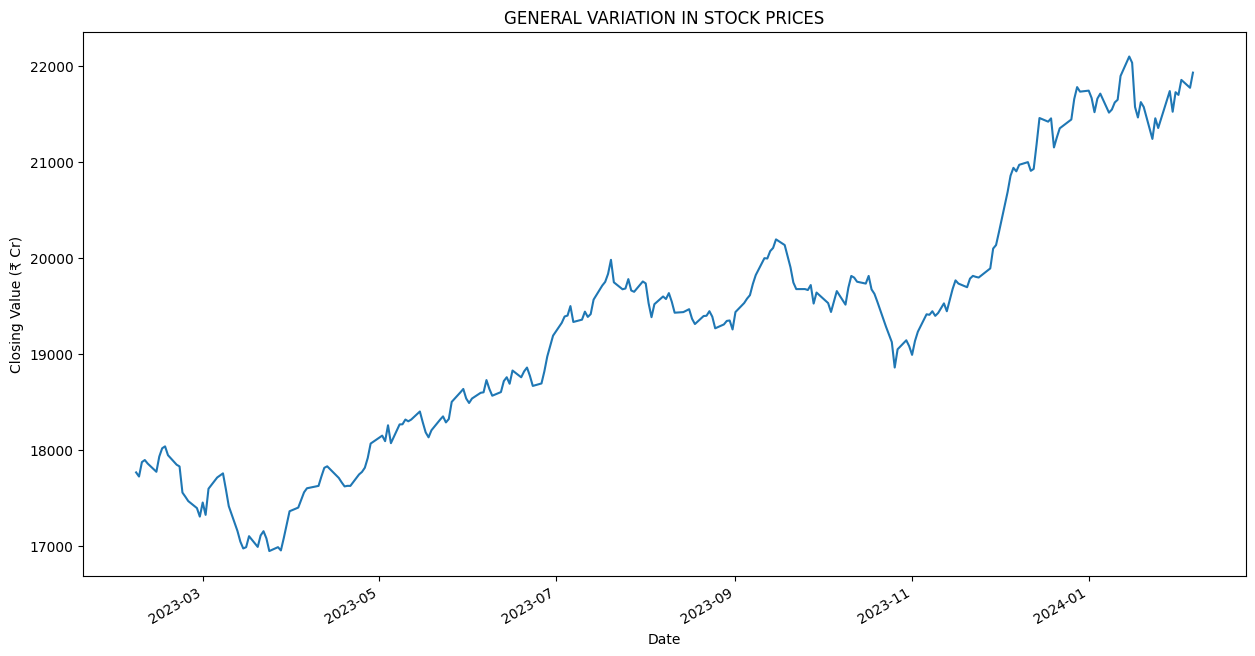

In [ ]:
df['Close '].plot(figsize=(15,8))
plt.ylabel('Closing Value (₹ Cr)')
plt.xlabel('Date')
plt.title("GENERAL VARIATION IN STOCK PRICES")
plt.show()

# **DAY TO DAY PERCENTAGE CHANGE AND DAILY RETURNS**

In [ ]:
df['Day_Perc_Change'] = df['Close '].pct_change()*100
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Day_Perc_Change
Date,,,,,,,,
2023-02-06,2023-02-06,17818.55,17823.70,17698.35,17764.60,282544790,21864.88,NaN
2023-02-07,2023-02-07,17790.10,17811.15,17652.55,17721.50,354395693,23611.08,-0.242617
2023-02-08,2023-02-08,17750.30,17898.70,17744.15,17871.70,290994265,23733.40,0.847558
2023-02-09,2023-02-09,17885.50,17916.90,17779.80,17893.45,260854055,21529.97,0.121701
2023-02-10,2023-02-10,17847.55,17876.95,17801.00,17856.50,231991834,17063.99,-0.206500


In [ ]:
df.dropna(axis=0, inplace=True)

<Axes: title={'center': 'DAY TO DAY PERCENTAGE CHANGE(DAILY RETURNS)'}, xlabel='DATE', ylabel='DAILY PERCENTAGE CHANGE'>

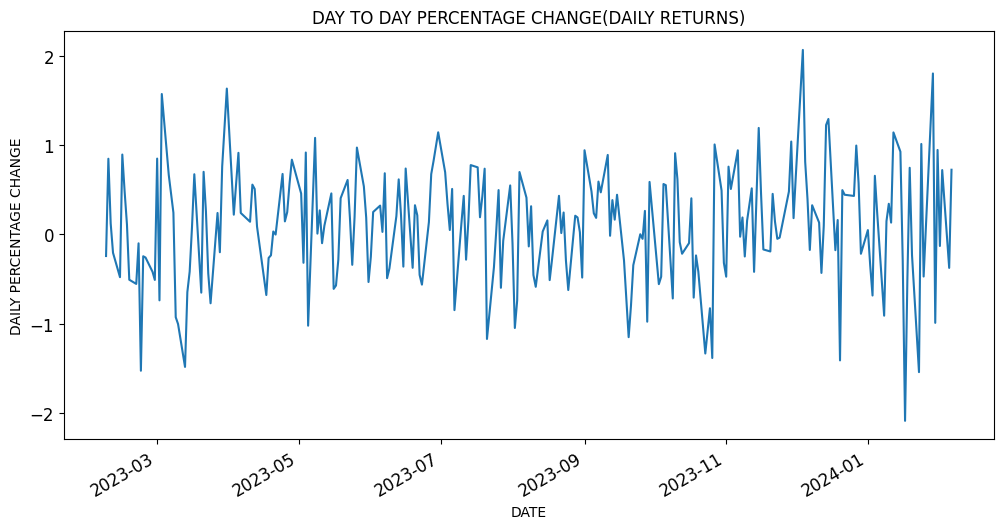

In [ ]:
df['Day_Perc_Change'].plot(figsize=(12,6),fontsize=12,title="DAY TO DAY PERCENTAGE CHANGE(DAILY RETURNS)", xlabel='DATE',ylabel='DAILY PERCENTAGE CHANGE')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Day_Perc_Change
Date,,,,,,,,
2023-02-07,2023-02-07,17790.10,17811.15,17652.55,17721.50,354395693,23611.08,-0.242617
2023-02-08,2023-02-08,17750.30,17898.70,17744.15,17871.70,290994265,23733.40,0.847558
2023-02-09,2023-02-09,17885.50,17916.90,17779.80,17893.45,260854055,21529.97,0.121701
2023-02-10,2023-02-10,17847.55,17876.95,17801.00,17856.50,231991834,17063.99,-0.206500
2023-02-13,2023-02-13,17859.10,17880.70,17719.75,17770.90,231276483,17406.31,-0.479377


# **Plotting daily returns distribution histogram**

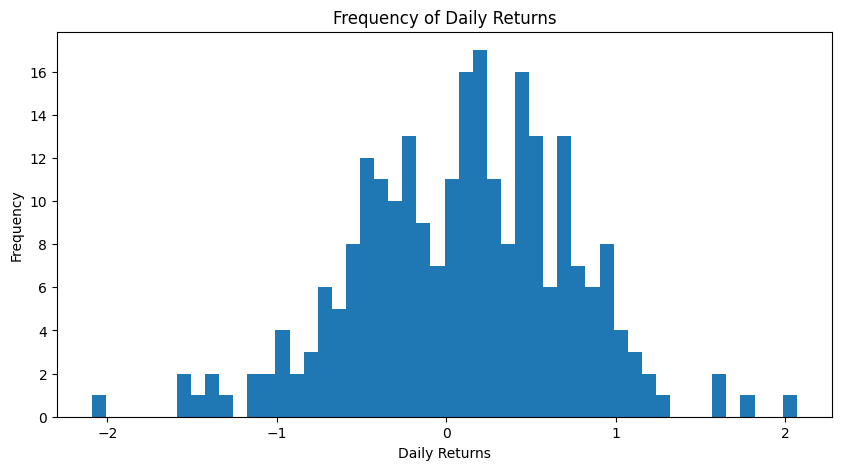

count    247.000000
mean       0.087317
std        0.635148
min       -2.089432
25%       -0.343063
50%        0.143807
75%        0.509059
max        2.066815
Name: Day_Perc_Change, dtype: float64

In [ ]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5),grid=False)
plt.xlabel ('Daily Returns')
plt.ylabel('Frequency')
plt.title("Frequency of Daily Returns")
plt.show()

df.Day_Perc_Change.describe()

# **Trend Analysis**

In [ ]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Day_Perc_Change,Trend
Date,,,,,,,,,
2023-02-07,2023-02-07,17790.10,17811.15,17652.55,17721.50,354395693,23611.08,-0.242617,Slight or No change
2023-02-08,2023-02-08,17750.30,17898.70,17744.15,17871.70,290994265,23733.40,0.847558,Slight Positive
2023-02-09,2023-02-09,17885.50,17916.90,17779.80,17893.45,260854055,21529.97,0.121701,Slight or No change
2023-02-10,2023-02-10,17847.55,17876.95,17801.00,17856.50,231991834,17063.99,-0.206500,Slight or No change
2023-02-13,2023-02-13,17859.10,17880.70,17719.75,17770.90,231276483,17406.31,-0.479377,Slight or No change


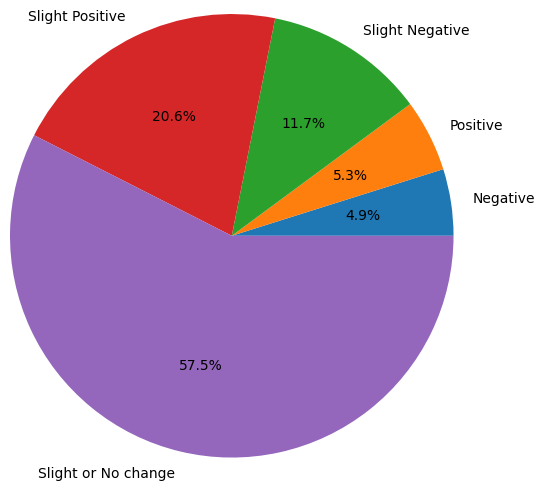

In [ ]:
DFC_pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(DFC_pie_data['Trend'].count(), labels = pie_label,
        autopct = '%1.1f%%', radius = 1.5)
plt.show()

# **Volatility Analysis**

Text(0.5, 1.0, 'Volatility Analysis')

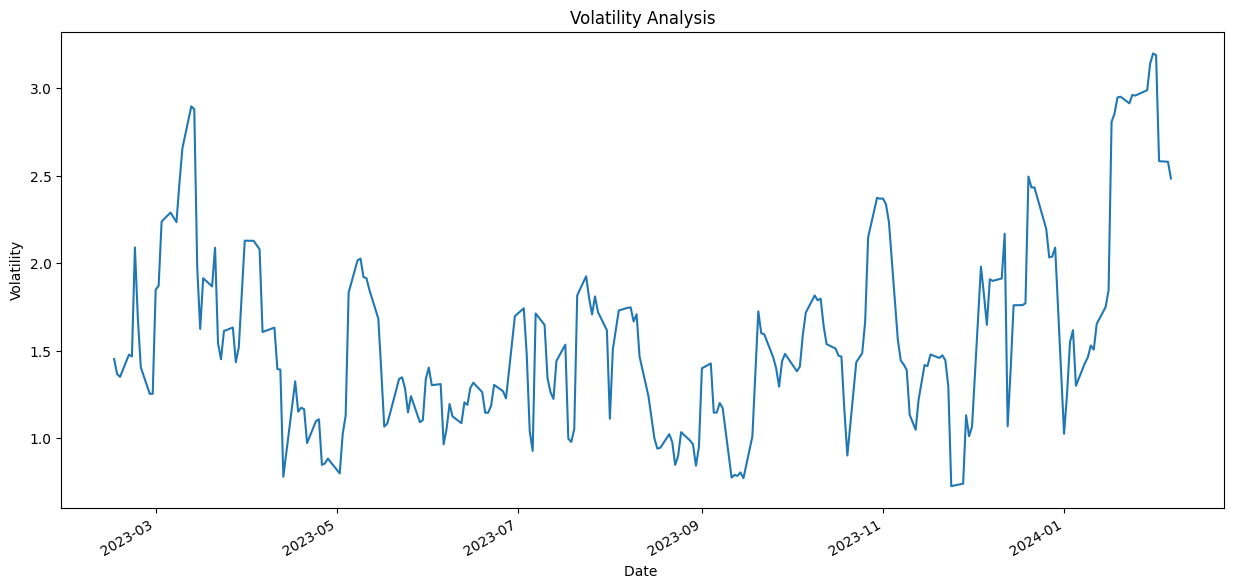

In [ ]:
vol = df["Day_Perc_Change"].rolling(7).std()*np.sqrt(7)
vol.plot(figsize = (15, 7))
plt.ylabel ('Volatility')
plt.title("Volatility Analysis")

In [ ]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Day_Perc_Change,Trend
Date,,,,,,,,,
2023-02-07,2023-02-07,17790.10,17811.15,17652.55,17721.50,354395693,23611.08,-0.242617,Slight or No change
2023-02-08,2023-02-08,17750.30,17898.70,17744.15,17871.70,290994265,23733.40,0.847558,Slight Positive
2023-02-09,2023-02-09,17885.50,17916.90,17779.80,17893.45,260854055,21529.97,0.121701,Slight or No change
2023-02-10,2023-02-10,17847.55,17876.95,17801.00,17856.50,231991834,17063.99,-0.206500,Slight or No change
2023-02-13,2023-02-13,17859.10,17880.70,17719.75,17770.90,231276483,17406.31,-0.479377,Slight or No change
...,...,...,...,...,...,...,...,...,...
2024-01-31,2024-01-31,21487.25,21741.35,21448.85,21725.70,410583065,41587.85,0.946004,Slight Positive
2024-02-01,2024-02-01,21780.65,21832.95,21658.75,21697.45,332541208,34042.15,-0.130030,Slight or No change
2024-02-02,2024-02-02,21812.75,22126.80,21805.55,21853.80,442794738,38395.90,0.720592,Slight Positive
